[View in Colaboratory](https://colab.research.google.com/github/cassiass/keras-tensorflow/blob/master/Projeto_aula5.ipynb)

Imports

In [ ]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

Carregando o dataset

In [ ]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()


Exploração dos dados

In [ ]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

Exibição dos dados

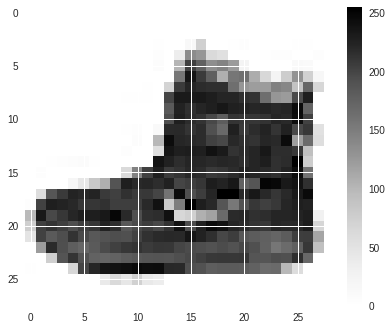

In [ ]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']
'''
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
'''  
plt.imshow(imagens_treino[0])
plt.colorbar()


In [ ]:
#normalização
imagens_treino = imagens_treino/float(255)

In [9]:


modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 10s 200us/step - loss: 2.3028 - acc: 0.0990 - val_loss: 2.3028 - val_acc: 0.0983
Epoch 2/5
48000/48000 [==============================] - 9s 190us/step - loss: 2.3028 - acc: 0.0996 - val_loss: 2.3028 - val_acc: 0.0983
Epoch 3/5
48000/48000 [==============================] - 9s 193us/step - loss: 2.3028 - acc: 0.0985 - val_loss: 2.3029 - val_acc: 0.0958
Epoch 4/5
48000/48000 [==============================] - 10s 205us/step - loss: 2.3028 - acc: 0.0980 - val_loss: 2.3028 - val_acc: 0.0958
Epoch 5/5
48000/48000 [==============================] - 9s 196us/step - loss: 2.3028 - acc: 0.1004 - val_loss: 2.3027 - val_acc: 0.0995


In [10]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

resultado teste: 1
número da imagem de teste: 2


In [11]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

10000/10000 [==============================] - 0s 39us/step
Perda do teste: 13.729463269042968
Acurácia do teste: 0.1105
